# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Country 1: EDA

In [3]:
# Load the data 
sales_data1 = pd.read_excel("SalesCountry1.xlsx")

# Display the first few rows to understand the structure
sales_data1.head()


,Date,Region 1,Region 2,Region 3
0,2021-05-03,9001.44,1619.94,273.98
1,2021-05-10,56345.45,9939.09,1584.03
2,2021-05-17,61777.17,10835.51,1643.88
3,2021-05-24,57489.25,9888.55,1598.66
4,2021-05-31,58345.77,10048.15,1512.21


In [12]:
print("Data type of 'Date' column:", sales_data1['Date'].dtype)

Data type of 'Date' column: datetime64[ns]


In [11]:
# sort the date column 
sales_data1 = sales_data1.sort_values(by='Date').reset_index(drop=True)

# Verify the sorting by displaying the first few rows
sales_data1.head()


,Date,Region 1,Region 2,Region 3
0,2021-05-03,9001.44,1619.94,273.98
1,2021-05-10,56345.45,9939.09,1584.03
2,2021-05-17,61777.17,10835.51,1643.88
3,2021-05-24,57489.25,9888.55,1598.66
4,2021-05-31,58345.77,10048.15,1512.21


## Country 1: Statistical summary

In [4]:
# Calculate summary statistics for each region
sales_data1.describe()

,Date,Region 1,Region 2,Region 3
count,152,152.000000,152.000000,152.000000
mean,2022-10-13 12:00:00,131859.035000,17230.998750,2908.403750
min,2021-05-03 00:00:00,9001.440000,1619.940000,273.980000
25%,2022-01-22 06:00:00,77043.242500,10661.280000,1810.462500
50%,2022-10-13 12:00:00,118024.865000,15741.880000,2555.595000
75%,2023-07-04 18:00:00,171701.670000,21946.995000,3941.787500
max,2024-03-25 00:00:00,444176.110000,53000.500000,7058.310000
std,NaN,70028.647832,8089.292174,1212.180193


## Country 1: Check for missing data

In [5]:
sales_data1.isnull().sum()

Date        0
Region 1    0
Region 2    0
Region 3    0
dtype: int64

## Country 1: Check for missing dates

In [10]:
# Convert 'Date' column to datetime
sales_data1['Date'] = pd.to_datetime(sales_data1['Date'])

# Generate a complete weekly date range from the minimum to the maximum date
full_date_range = pd.date_range(start=sales_data1['Date'].min(), 
                                end=sales_data1['Date'].max(), 
                                freq='W-MON')

# Identify missing dates by comparing with the full date range
missing_dates = full_date_range.difference(sales_data1['Date'])

print("Missing Dates in SalesCountry1:")
print(missing_dates)
print(f"\nTotal Missing Weeks: {len(missing_dates)}")


Missing Dates in SalesCountry1:
DatetimeIndex([], dtype='datetime64[ns]', freq='W-MON')

Total Missing Weeks: 0


## Country 1: Plot Sales Trends for Each Region

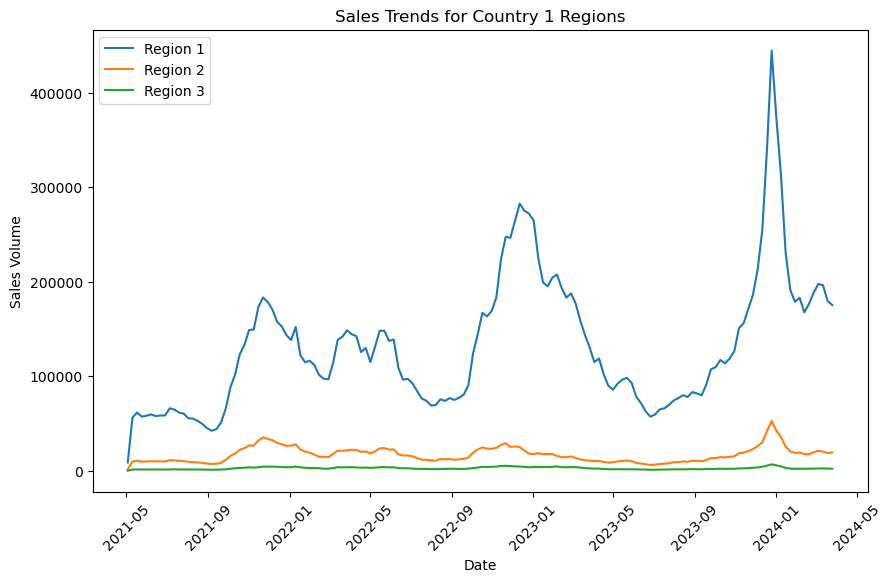

In [8]:
plt.figure(figsize=(10, 6))
for region in ['Region 1', 'Region 2', 'Region 3']:
    plt.plot(sales_data1['Date'], sales_data1[region], label=region)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Trends for Country 1 Regions')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Country 1: Check for Stationarity

## Region 1

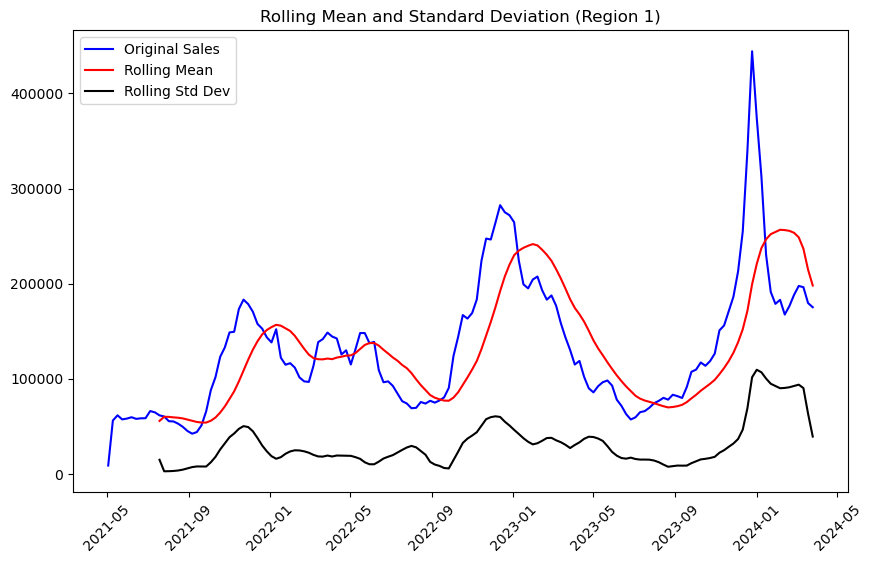

In [14]:
# Calculate rolling mean and standard deviation

# Using a 12-week rolling window:
# Given that the dataset contains 152 weekly observations (~3 years),
# a 12-week window (approximately one quarter) provides a good balance.

rolling_mean = sales_data1['Region 1'].rolling(window=12).mean()
rolling_std = sales_data1['Region 1'].rolling(window=12).std()

# Plot the original sales along with rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(sales_data1['Date'], sales_data1['Region 1'], label='Original Sales', color='blue')
plt.plot(sales_data1['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(sales_data1['Date'], rolling_std, label='Rolling Std Dev', color='black')

plt.title('Rolling Mean and Standard Deviation (Region 1)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Region 2

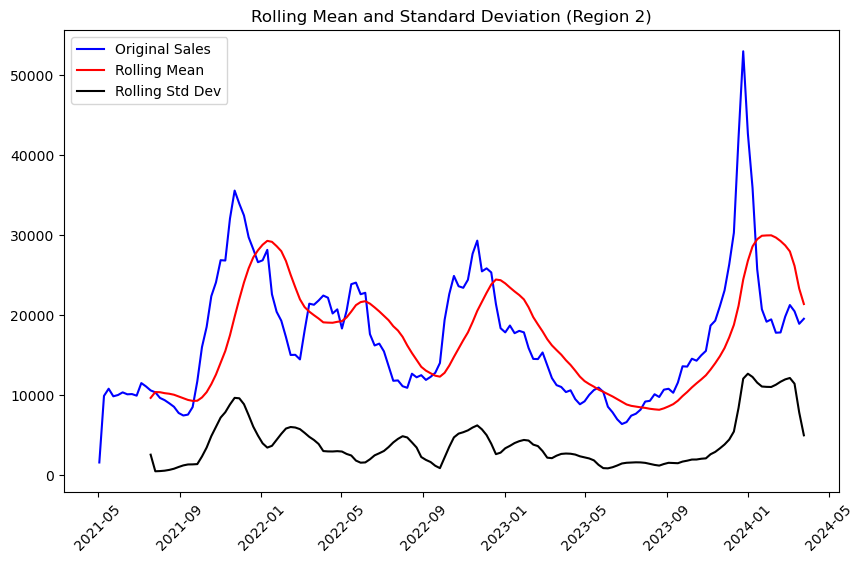

In [17]:
rolling_mean = sales_data1['Region 2'].rolling(window=12).mean()
rolling_std = sales_data1['Region 2'].rolling(window=12).std()

# Plot the original sales along with rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(sales_data1['Date'], sales_data1['Region 2'], label='Original Sales', color='blue')
plt.plot(sales_data1['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(sales_data1['Date'], rolling_std, label='Rolling Std Dev', color='black')

plt.title('Rolling Mean and Standard Deviation (Region 2)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Region 3

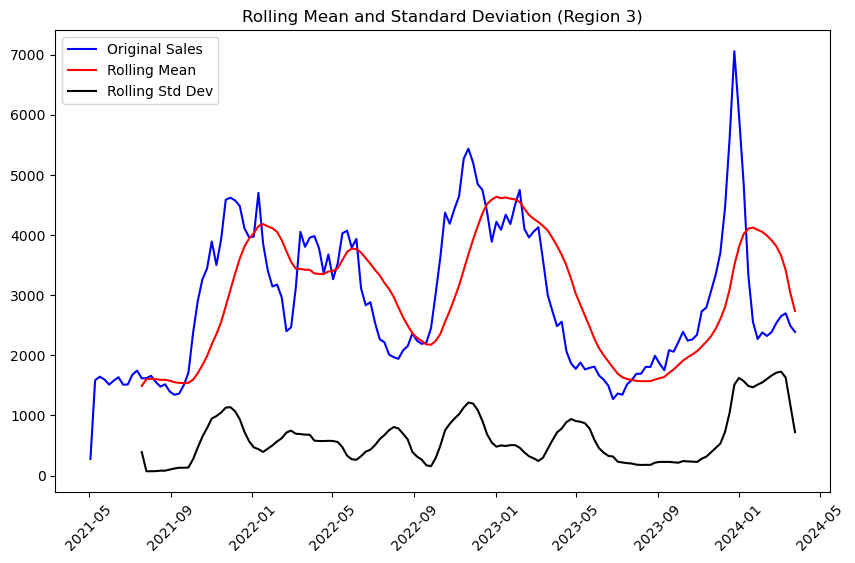

In [19]:
rolling_mean = sales_data1['Region 3'].rolling(window=12).mean()
rolling_std = sales_data1['Region 3'].rolling(window=12).std()

# Plot the original sales along with rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(sales_data1['Date'], sales_data1['Region 3'], label='Original Sales', color='blue')
plt.plot(sales_data1['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(sales_data1['Date'], rolling_std, label='Rolling Std Dev', color='black')

plt.title('Rolling Mean and Standard Deviation (Region 3)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

#### Insights from above graph
1. There are clear seasonal patterns
2. The rolling mean and standard deviation aren't constant, indicating the data is non-stationary.
3. Variability increases significantly around late 2023, which might require further investigation—perhaps an external factor influenced these sales.

## Country 1: Check for outliers

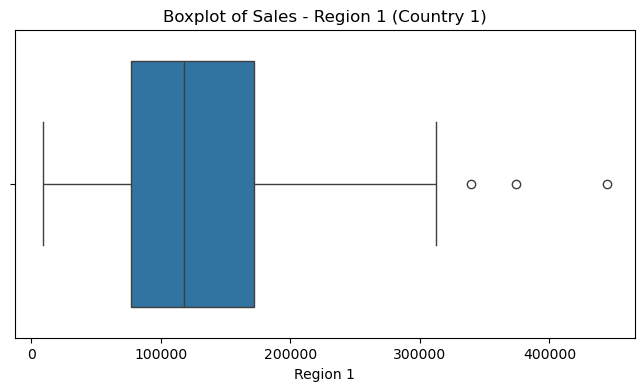

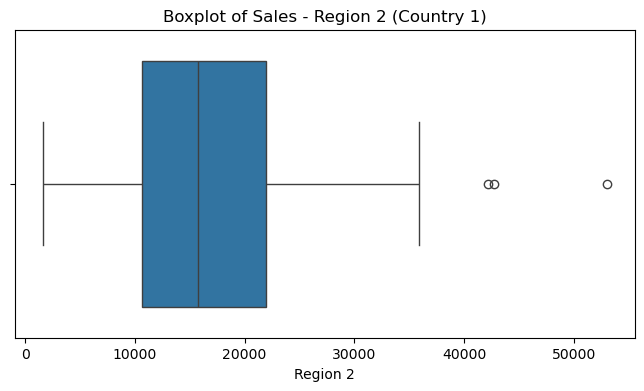

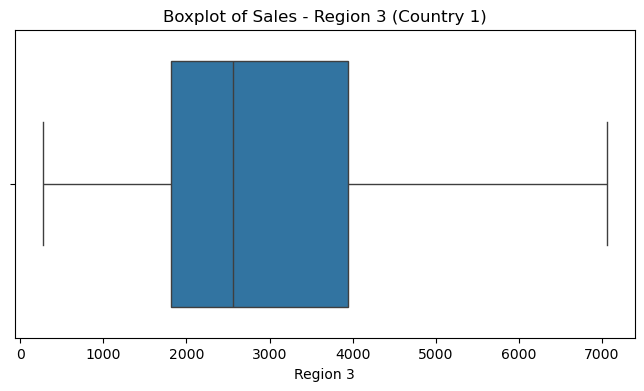

In [24]:
# Create boxplots for each region to detect outliers
regions = ['Region 1', 'Region 2', 'Region 3']

for region in regions:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=sales_data1[region])
    plt.title(f'Boxplot of Sales - {region} (Country 1)')
    plt.show()


### Outlier Detection - Country 1
- **Region 1**: Three outliers detected with unusually high sales beyond 400,000 units. These may correspond to seasonal demand spikes or promotions.
- **Region 2**: A few moderate outliers with sales exceeding 50,000 units.
- **Region 3**: No significant outliers observed; sales remain relatively stable with low variability.
- **Conclusion**: Outliers will not be removed at this stage as they may represent meaningful events. Further investigation may be needed during the modeling phase.

In [25]:
# Calculate the correlation matrix for regions
correlation_matrix = sales_data1[['Region 1', 'Region 2', 'Region 3']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Region 1  Region 2  Region 3
Region 1  1.000000  0.824843  0.859936
Region 2  0.824843  1.000000  0.881737
Region 3  0.859936  0.881737  1.000000


#####  The high correlation between the regions (values around 0.82 - 0.88) suggests that sales patterns across the regions move together. 

# Country 1: Autocorrelation and Partial Autocorrelation Analysis

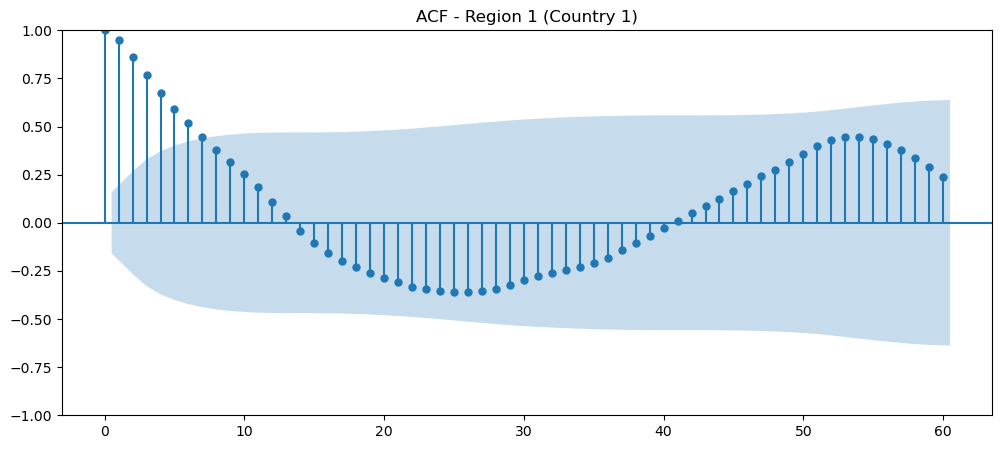

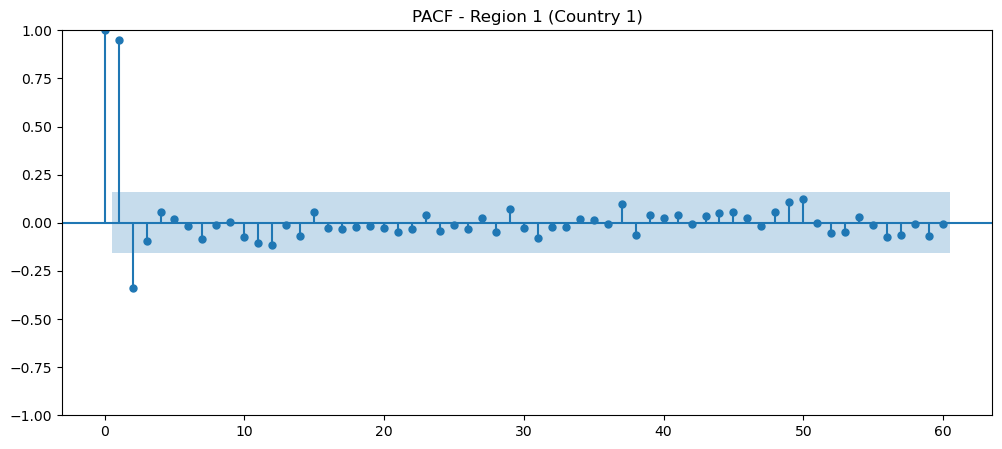

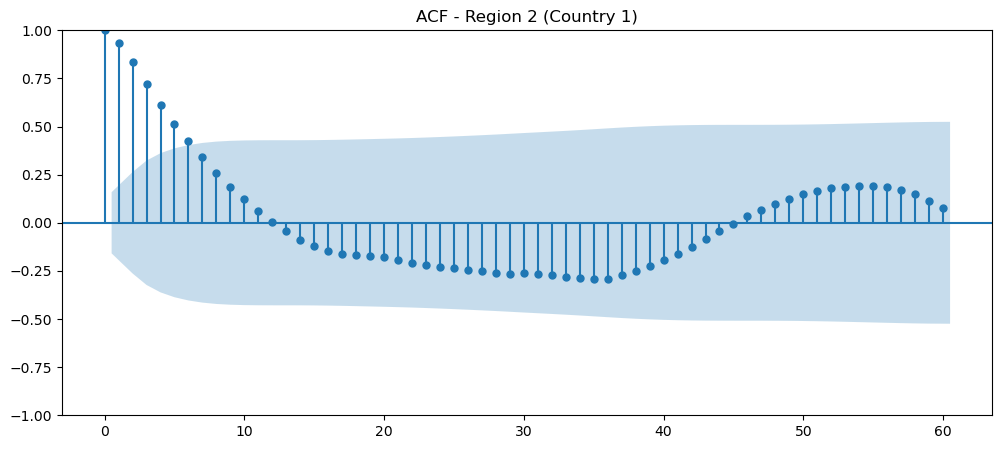

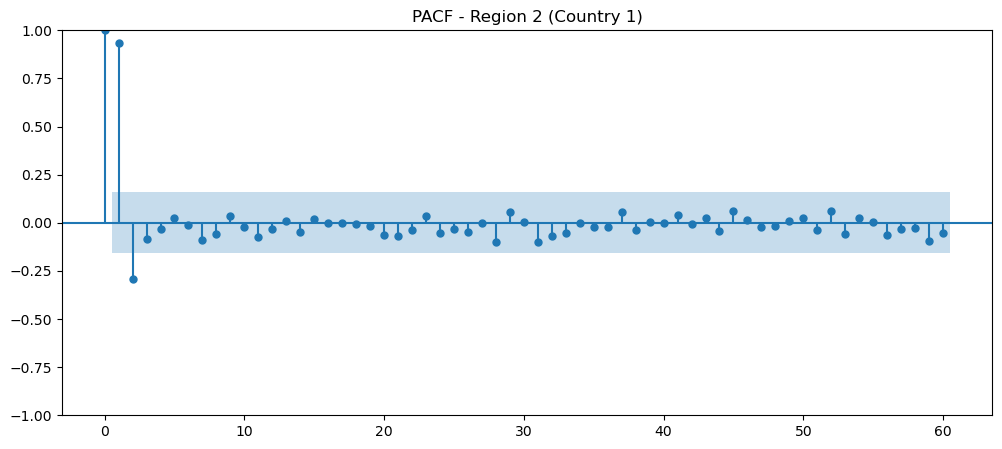

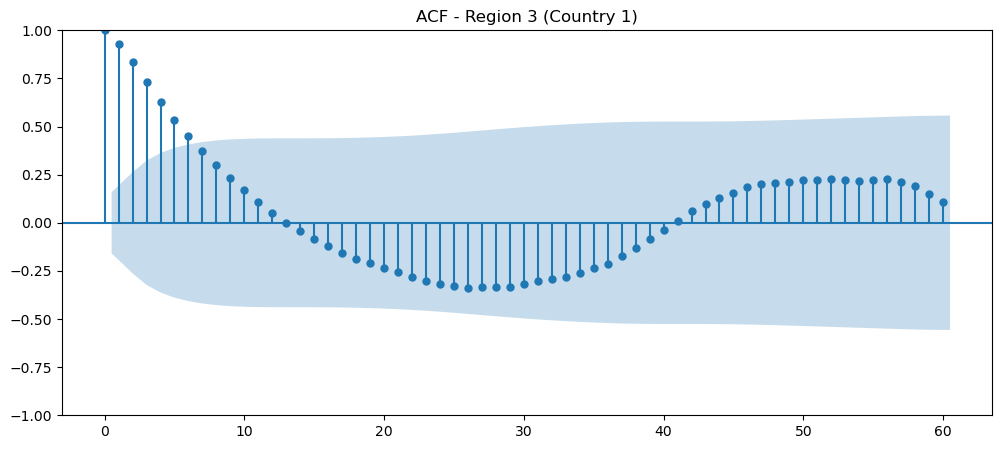

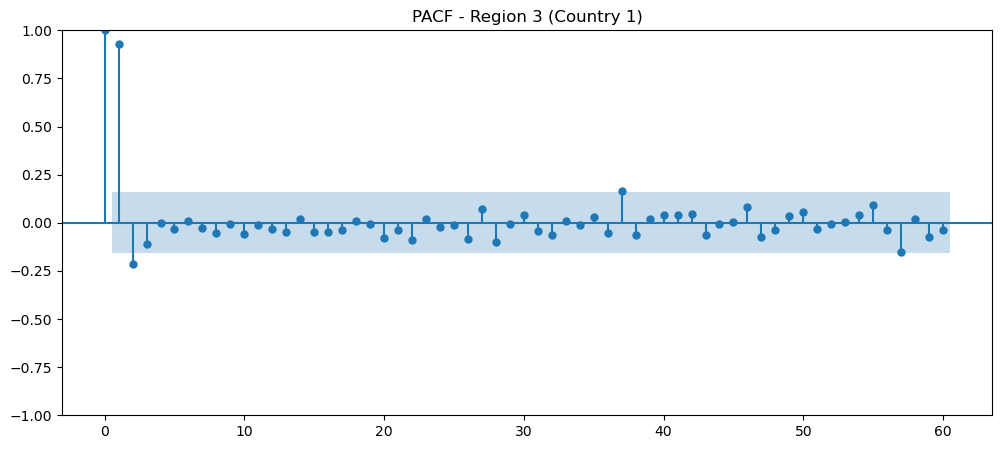

In [30]:
# Plot ACF and PACF for each region
for region in regions:
    plt.figure(figsize=(12, 5))
    plot_acf(sales_data1[region], lags=60, ax=plt.gca())
    plt.title(f'ACF - {region} (Country 1)')
    plt.show()

    plt.figure(figsize=(12, 5))
    plot_pacf(sales_data1[region], lags=60, method='ywm', ax=plt.gca())
    plt.title(f'PACF - {region} (Country 1)')
    plt.show()

### ACF and PACF Observations - Country 1
- **ACF Analysis**:
  - The first **7 lags** are significant, suggesting that sales from the past 7 weeks have an influence on the current week’s sales.
  - This indicates **short-term dependencies** and suggests using **rolling averages** for feature engineering.

- **PACF Analysis**:
  - Only **lag-1 and lag-2** are significant, indicating that **recent 1-2 weeks** have a direct impact on the current week’s sales.
  - Beyond lag-2, the partial autocorrelation falls within the confidence interval, meaning additional lags don't add much new information.

# Country 2: EDA

In [5]:
sales_data2 = pd.read_excel("../../data/raw/SalesCountry2.xlsx")
sales_data2.head()

,Date,Region 1,Region 2,Region 3,National
0,2019-01-07,10827.2000,54055.7500,34619.6250,99502.5750
1,2019-01-14,10523.3750,51052.6875,30550.1000,92126.1625
2,2019-01-21,12860.5125,57290.2000,36072.2875,106223.0000
3,2019-01-28,14841.4625,62758.1750,41300.5375,118900.1750
4,2019-02-04,15490.0625,71519.6625,45111.7875,132121.5125


In [35]:
print("Data type of 'Date' column:", sales_data2['Date'].dtype)

Data type of 'Date' column: datetime64[ns]


In [38]:
# sort the date column 
sales_data2 = sales_data2.sort_values(by='Date').reset_index(drop=True)

# Verify the sorting by displaying the first few rows
sales_data2.head()

,Date,Region 1,Region 2,Region 3,National
0,2019-01-07,10827.2000,54055.7500,34619.6250,99502.5750
1,2019-01-14,10523.3750,51052.6875,30550.1000,92126.1625
2,2019-01-21,12860.5125,57290.2000,36072.2875,106223.0000
3,2019-01-28,14841.4625,62758.1750,41300.5375,118900.1750
4,2019-02-04,15490.0625,71519.6625,45111.7875,132121.5125


# Country 2: Statistical Summary 

In [39]:
# Calculate summary statistics for each region
sales_data2.describe()

,Date,Region 1,Region 2,Region 3,National
count,236,236.000000,236.000000,236.000000,236.000000
mean,2021-04-14 21:03:03.050847488,7769.257203,34755.000424,23889.238824,66413.496451
min,2019-01-07 00:00:00,1195.400000,5852.425000,3944.012500,11053.400000
25%,2020-02-29 06:00:00,4536.250000,18507.396875,12922.734375,35918.253125
50%,2021-04-15 12:00:00,7318.143750,30464.918750,21680.668750,60221.575000
75%,2022-05-31 18:00:00,10402.165625,48197.221875,33262.721875,91347.993750
max,2023-07-24 00:00:00,28640.450000,118398.600000,86862.500000,233901.550000
std,NaN,4226.889541,19603.406921,13462.307305,36960.389729


# Country 2: Check for missing data

In [40]:
sales_data2.isnull().sum()

Date        0
Region 1    0
Region 2    0
Region 3    0
National    0
dtype: int64

# Country 2: Check for missing dates

In [42]:
# Convert 'Date' column to datetime
sales_data2['Date'] = pd.to_datetime(sales_data2['Date'])

# Generate a complete weekly date range from the minimum to the maximum date
full_date_range = pd.date_range(start=sales_data2['Date'].min(), 
                                end=sales_data2['Date'].max(), 
                                freq='W-MON')

# Identify missing dates by comparing with the full date range
missing_dates = full_date_range.difference(sales_data2['Date'])

print("Missing Dates in SalesCountry2:")
print(missing_dates)
print(f"\nTotal Missing Weeks: {len(missing_dates)}")


Missing Dates in SalesCountry2:
DatetimeIndex(['2019-12-30', '2022-12-26'], dtype='datetime64[ns]', freq=None)

Total Missing Weeks: 2


### Missing Dates - Country 2
- Found **two missing weeks** in the data:
  - **2019-12-30**
  - **2022-12-26**

- These missing weeks could correspond to **holidays or data recording issues**.

- **Handling Strategy**: 
  - We will address these missing dates during the **system implementation phase** using an **OOP-based approach**. This will allow flexibility in choosing strategies like forward fill or interpolation.

# Country 2: Plot sales trends for each region 

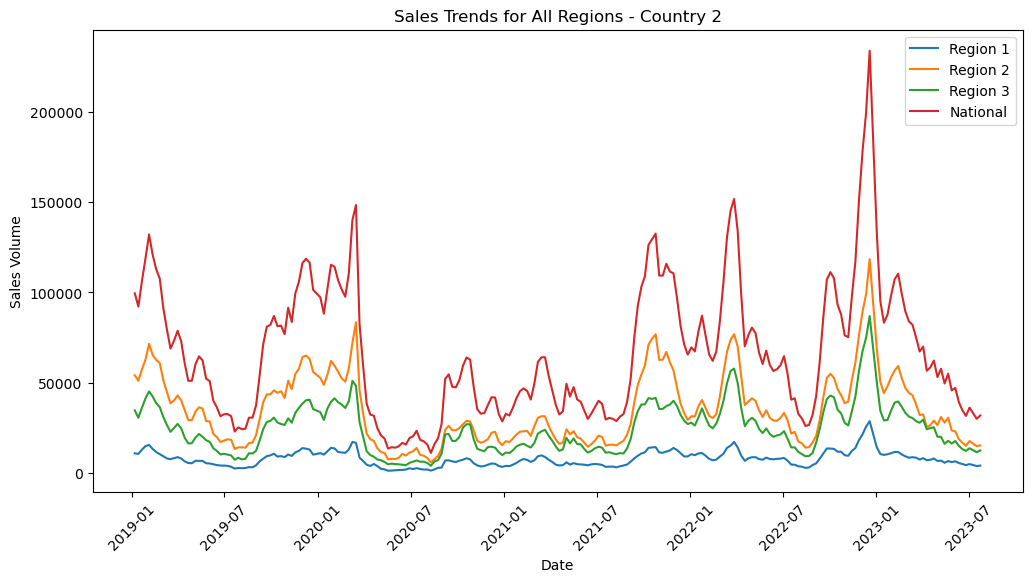

In [45]:
plt.figure(figsize=(12, 6))

for region in ['Region 1', 'Region 2', 'Region 3', 'National']:
    plt.plot(sales_data2['Date'], sales_data2[region], label=region)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Trends for All Regions - Country 2')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()


# Country 2: Check for outliers

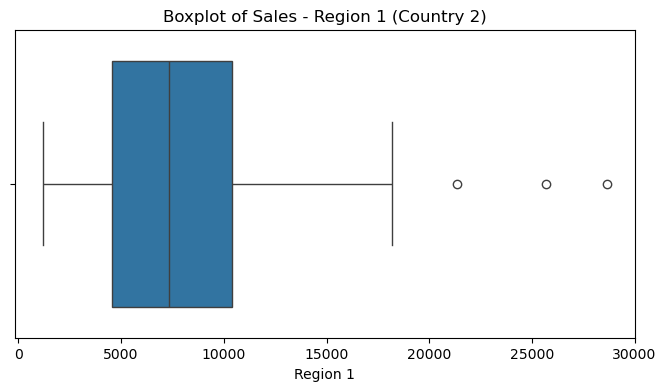

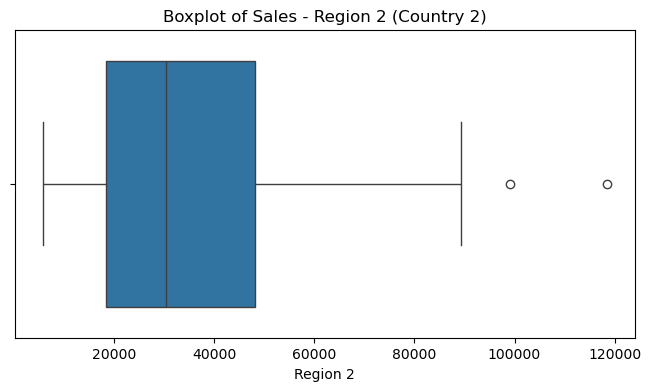

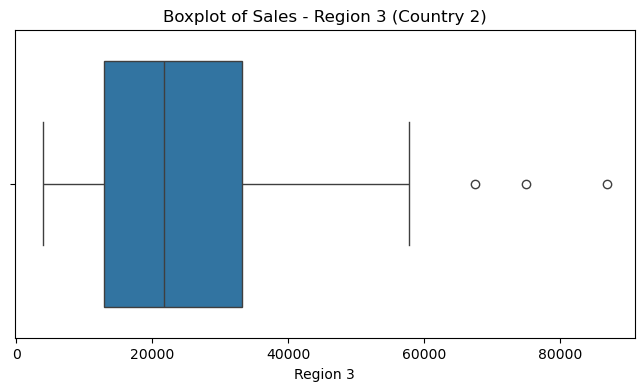

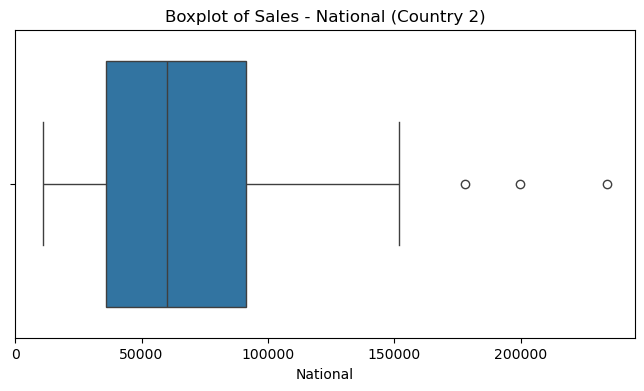

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create individual boxplots for each region and national sales
regions = ['Region 1', 'Region 2', 'Region 3', 'National']

for region in regions:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=sales_data2[region])
    plt.title(f'Boxplot of Sales - {region} (Country 2)')
    plt.show()


# Country 2: Correlation Analysis 

In [47]:
# Calculate the correlation matrix for regions in Country 2
correlation_matrix_2 = sales_data2[['Region 1', 'Region 2', 'Region 3', 'National']].corr()

# Display the correlation matrix
print("Correlation Matrix - Country 2:")
print(correlation_matrix_2)

Correlation Matrix - Country 2:
          Region 1  Region 2  Region 3  National
Region 1  1.000000  0.961995  0.980702  0.981802
Region 2  0.961995  1.000000  0.969358  0.993481
Region 3  0.980702  0.969358  1.000000  0.990529
National  0.981802  0.993481  0.990529  1.000000


#### Regions are highly correlated (values between 0.96 and 0.98), suggesting that sales trends are very similar across regions.
#### National sales are also highly correlated with all regions (0.98 - 0.99), indicating that regional and national trends move closely together.


ACF and PACF for Region 1 - Country 2


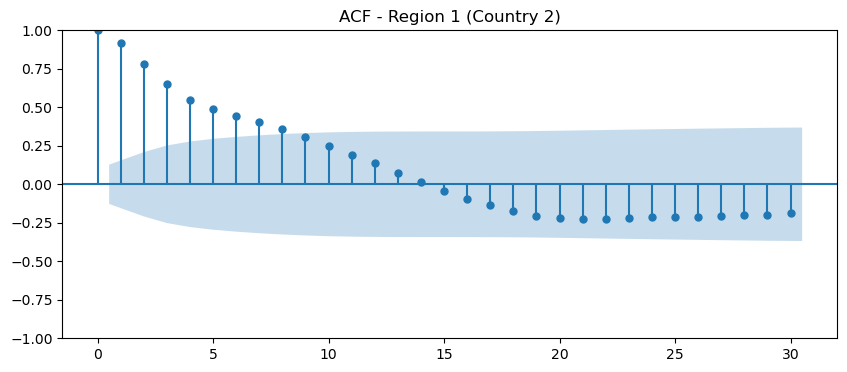

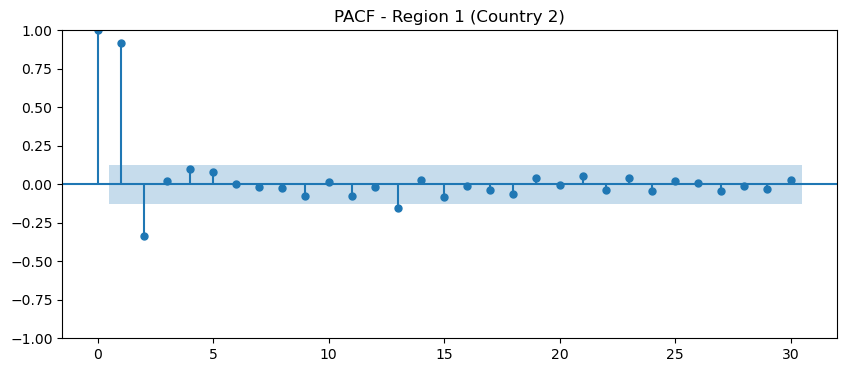


ACF and PACF for Region 2 - Country 2


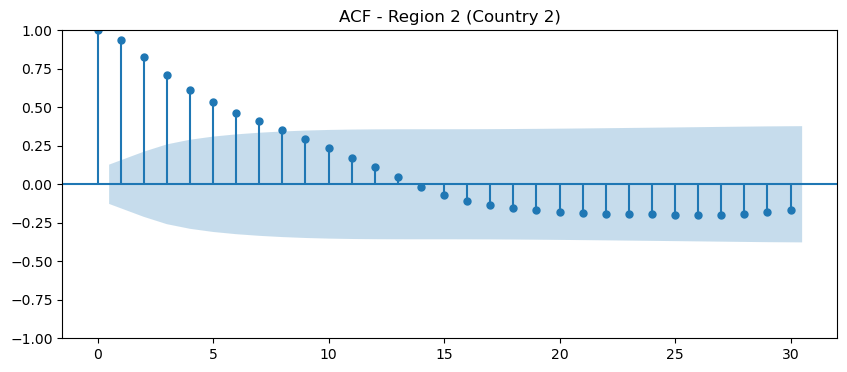

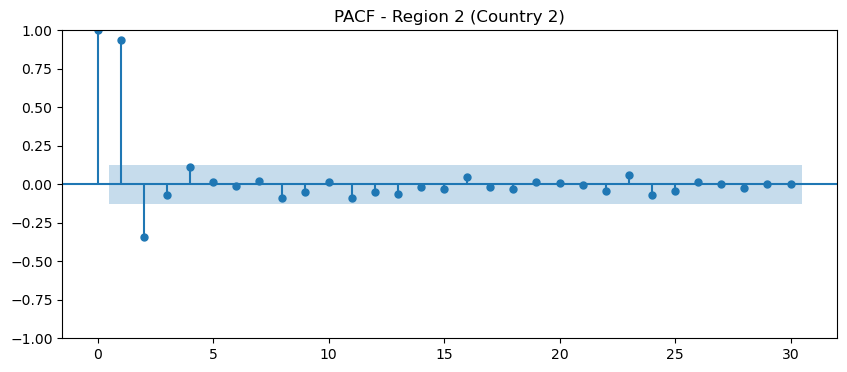


ACF and PACF for Region 3 - Country 2


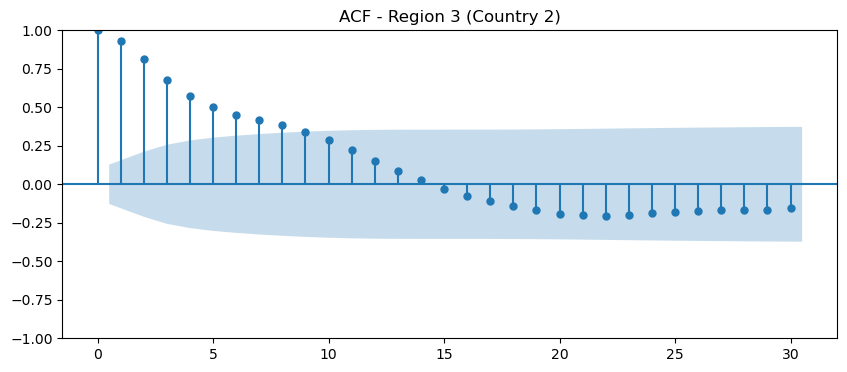

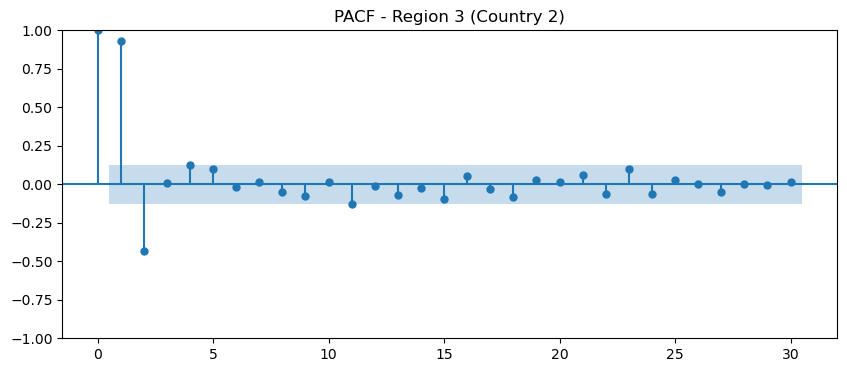


ACF and PACF for National - Country 2


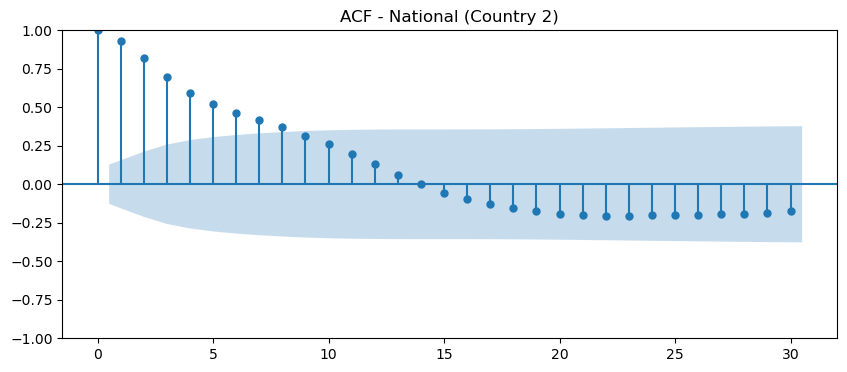

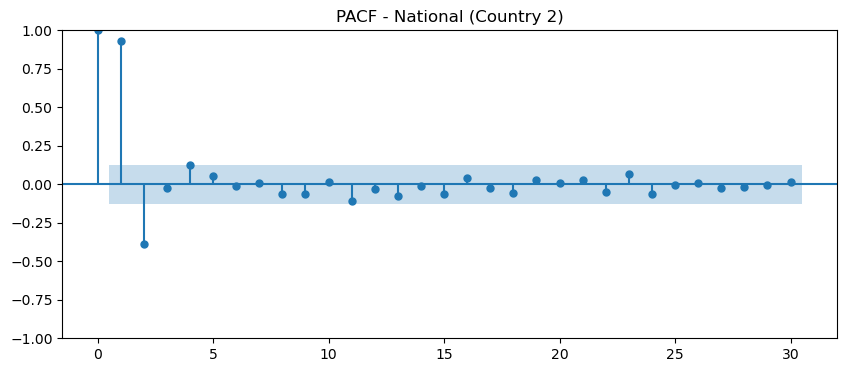

In [48]:
regions = ['Region 1', 'Region 2', 'Region 3', 'National']

# Plot ACF and PACF for each region
for region in regions:
    print(f"\nACF and PACF for {region} - Country 2")
    
    # ACF Plot
    plt.figure(figsize=(10, 4))
    plot_acf(sales_data2[region], lags=30, ax=plt.gca())
    plt.title(f'ACF - {region} (Country 2)')
    plt.show()
    
    # PACF Plot
    plt.figure(figsize=(10, 4))
    plot_pacf(sales_data2[region], lags=30, method='ywm', ax=plt.gca())
    plt.title(f'PACF - {region} (Country 2)')
    plt.show()

#### ACF:

The first 7 lags are significant, suggesting short-term dependencies across recent weeks.
The gradual decay indicates a trend component in the data.

#### PACF:

Only lag-1 and lag-2 are significant, implying that the recent 1-2 weeks' sales directly influence the current week's sales.
No significant partial autocorrelations beyond lag-2, meaning additional lags offer limited new information.

## Overall Observations - Country 1 vs Country 2

### Data Frequency & Structure:
- Both countries have **weekly sales data recorded on Mondays**.
- **Country 1** has no missing dates, while **Country 2** is missing **two weeks** (2019-12-30 and 2022-12-26).

### Sales Trends:
- Both countries show **similar trends across regions**, with aligned peaks and troughs.
- **Regional sales** and **national sales** are highly correlated in both countries, indicating consistent patterns.

### Outlier Detection:
- **Country 1**:
  - Region 1 showed a **few extreme outliers** beyond 400,000 units.
  - Region 2 and Region 3 had **moderate or no significant outliers**.
- **Country 2**:
  - **More outliers** observed overall, with high sales weeks spread across regions.

### Correlation Analysis:
- **Country 1**: 
  - **High correlations** among regions (0.82 to 0.88), indicating shared sales patterns.
- **Country 2**:
  - **Even higher correlations** (0.96 to 0.99) across regions, suggesting very similar behavior among regions.

### ACF/PACF Analysis:
- Both countries exhibit **short-term dependencies** with the **first 7 lags** significant in the ACF.
- The **PACF shows only lag-1 and lag-2** are significant, meaning **recent weeks' sales** have the strongest direct impact on current sales.
